## Predicting House Price using Regression 

### About Dataset

This dataset contains detailed information on 13,932 single-family home sales in Miami. Each row represents a sold property, with features such as square footage, number of bedrooms/bathrooms, year built, and more. 
Data Source: Available on [Kaggle](https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset) and [OpenML](https://api.openml.org/d/43093)

### Content
The dataset contains the following columns:

| Variable | Description                                                          |
|----------|----------------------------------------------------------------------|
| PARCELNO | unique identifier for each property. About 1\% appear multiple times |
| SALE_PRC | sale price (\$)|
| LND_SQFOOT | land area (square feet) |
| TOT_LVG_AREA | floor area (square feet) |
| SPEC_FEAT_VAL | value of special features (e.g., swimming pools) (\$) |
| RAIL_DIST | distance to the nearest rail line (an indicator of noise) (feet) |
| OCEAN_DIST | distance to the ocean (feet) |
| WATER_DIST | distance to the nearest body of water (feet) |
| CNTR_DIST | distance to the Miami central business district (feet) |
| SUBCNTR_DI | distance to the nearest subcenter (feet) |
| HWY_DIST | distance to the nearest highway (an indicator of noise) (feet) |
| age | age of the structure |
| avno60plus | dummy variable for airplane noise exceeding an acceptable level |
| structure_quality | quality of the structure |
| month_sold | sale month in 2016 (1 = jan)
| LATITUDE | Latitude co-ordinate |
| LONGITUDE | Longitude co_ordinate |


### Objective

To build and evaluate regression models to predict housing prices based on property features such as floor area, ocean distance, structure quality to name a few.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

#### Loading the dataset

In [2]:
df = pd.read_csv('miami_housing.csv')
df.head(3)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4


## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

We got no object type data, it is all numeric data which is good for Regression.

In [4]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


**Outliers:**

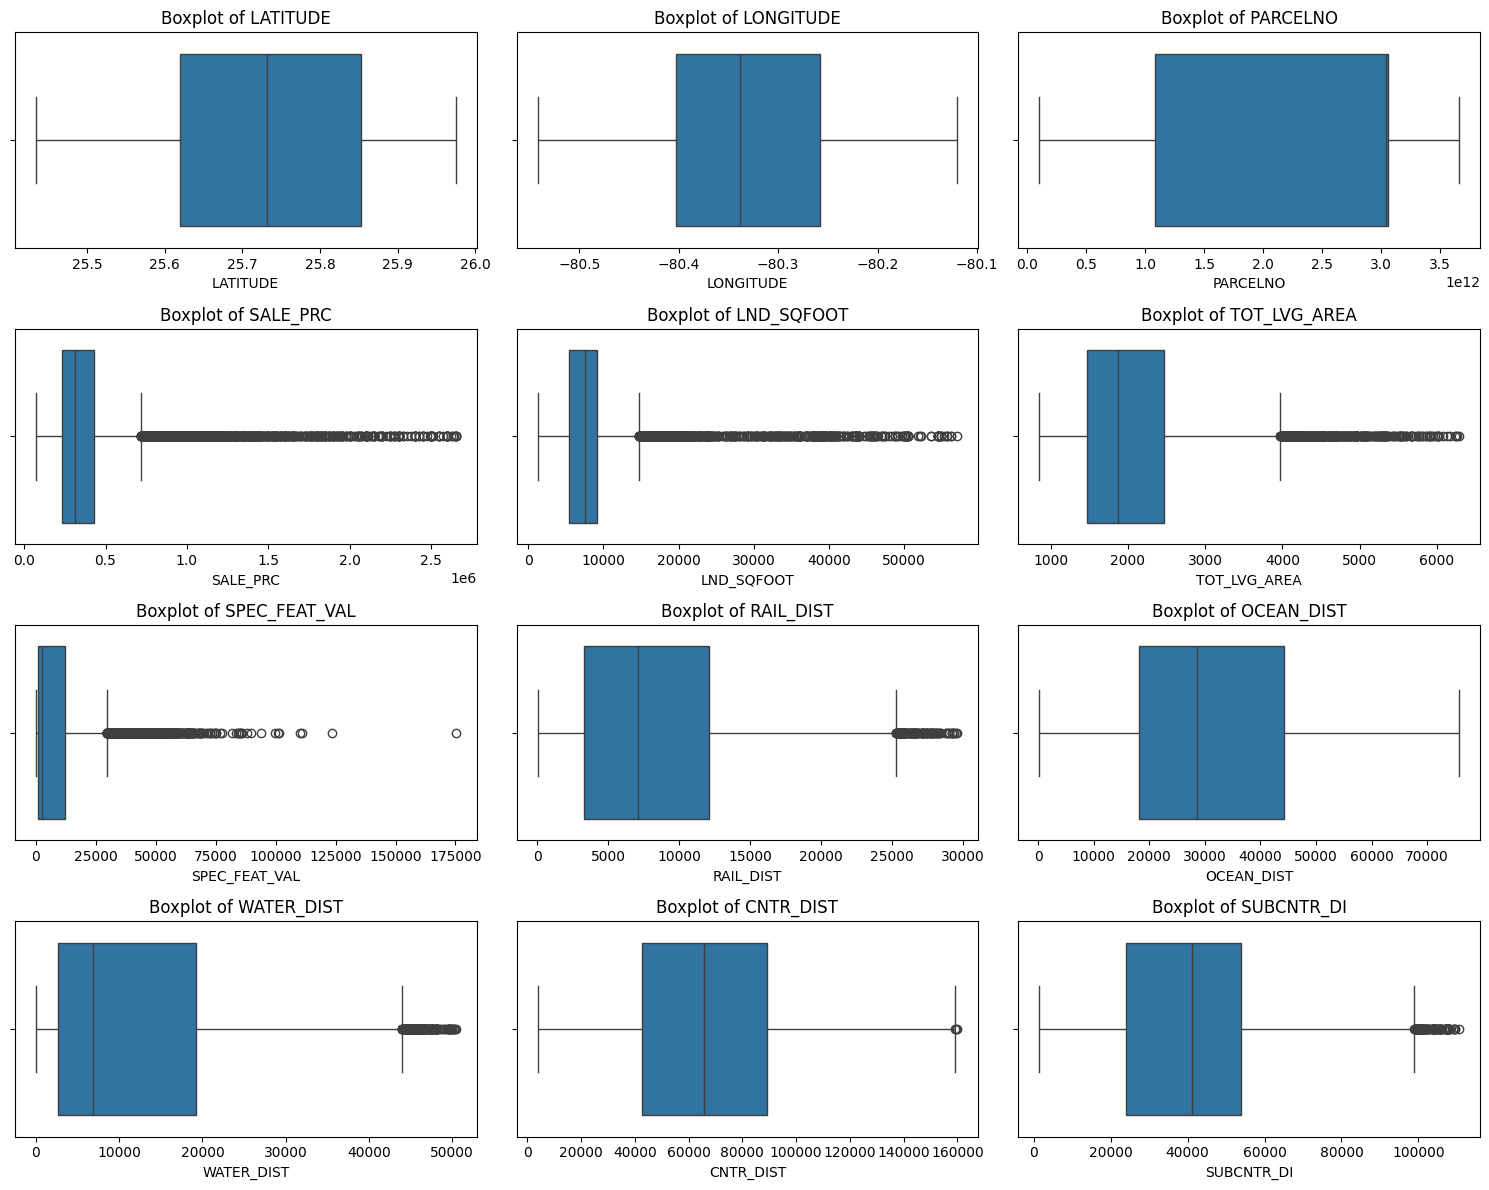

In [5]:
n_rows = 4
n_cols = 3

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    if i < len(axes):  
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
    else:
        break  

plt.tight_layout()
plt.show()

**Correlation:**

In [6]:
df.corr()['SALE_PRC'].drop('SALE_PRC').sort_values(ascending=False)

TOT_LVG_AREA         0.667301
SPEC_FEAT_VAL        0.497500
structure_quality    0.383995
LND_SQFOOT           0.363077
HWY_DIST             0.231877
LONGITUDE            0.195274
LATITUDE             0.047701
month_sold           0.000325
avno60plus          -0.027026
RAIL_DIST           -0.077009
age                 -0.123408
WATER_DIST          -0.127938
PARCELNO            -0.204068
CNTR_DIST           -0.271425
OCEAN_DIST          -0.274675
SUBCNTR_DI          -0.370078
Name: SALE_PRC, dtype: float64

Text(0.5, 1.0, 'Correlation Heat Map')

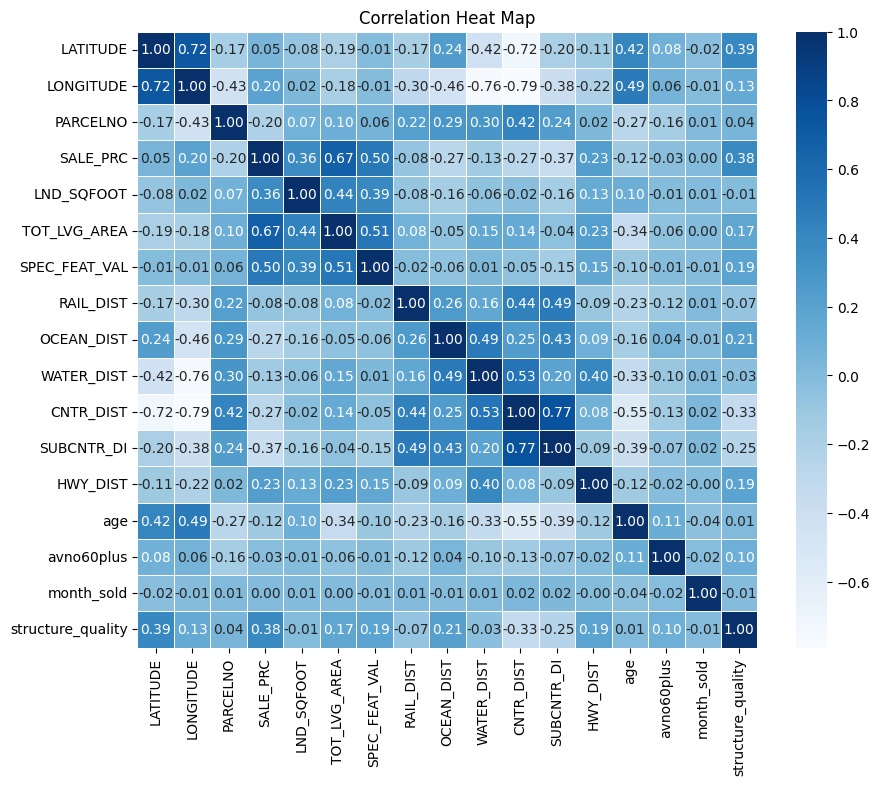

In [7]:
cor_mat = df.corr()

plt.figure(figsize=(10,8))
hmap = sns.heatmap(cor_mat, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, annot_kws={'size':10})
hmap.set_title("Correlation Heat Map", fontsize=12)

Visualizing the correlation between *Price* and *Living Area*

<Axes: xlabel='TOT_LVG_AREA', ylabel='SALE_PRC'>

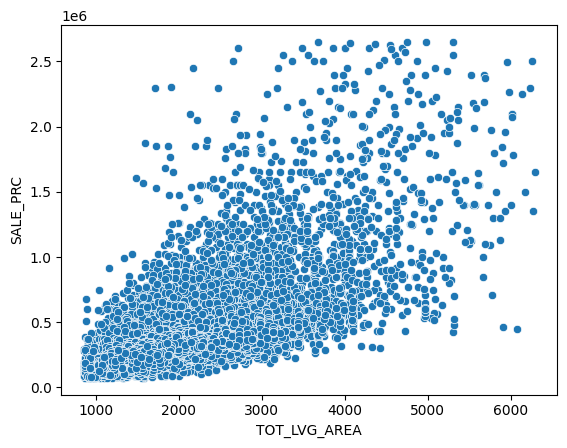

In [8]:
sns.scatterplot(x='TOT_LVG_AREA', y='SALE_PRC',data=df)

Distribution of our target variable:

<Axes: xlabel='SALE_PRC', ylabel='Count'>

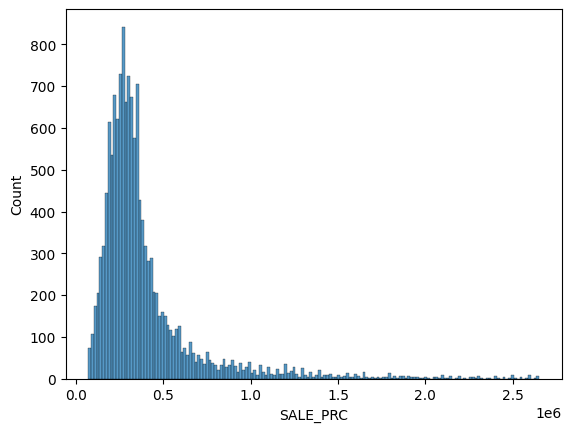

In [9]:
sns.histplot(x="SALE_PRC",data=df)

Sale Price is not normally distributed, rather it is positively skewed.

If we were to stick strictly to linear models we might have to do log or box-cox transformation,
else we can use non-linear models.

### Data Preprocessing

In [10]:
df.notnull().value_counts().mean()

13932.0

There are no null data present in this dataset.

In [11]:
X = df.drop('SALE_PRC', axis=1)
X_columns = list(X.columns)
X.head()

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [12]:
Y = df['SALE_PRC']
Y.head()

0    440000.0
1    349000.0
2    800000.0
3    988000.0
4    755000.0
Name: SALE_PRC, dtype: float64

#### Splitting and Scaling our data:

We have to split our data into train and test set so we can see how our model predicts unseen data.

We have to scale the data ,so it can fit the model well with less bias.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=37)

In [14]:
X_train.shape, Y_train.shape

((11145, 16), (11145,))

In [15]:
MMS = MinMaxScaler()

MMS.fit(X_train)

MinMaxScaler()

In [16]:
X_train = MMS.transform(X_train)
X_test = MMS.transform(X_test)

#### Metric Functions

We will start modeling out data, let us create a mertic function, plot function so we don't have to type this repetitively.

In [17]:
model_m = []
r2_m = []
mae_m = []
rmse_m = []
mape_m = []

def scores(y_test, y_pred, model):
    '''
    this function measures the metrics to measure 
    the model's accuracy.
    '''
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape_ = mean_absolute_percentage_error(y_test, y_pred)
    
    print("Model: ", model)
    print("R2 Score: ", r2)
    print("Mean Absolute Error: ", mae)
    print("Root Mean Squared Error: ", rmse)
    print("Mean Absolute Percent Error: ", mape_)

    model_m.append(model)
    r2_m.append(r2)
    mae_m.append(mae)
    rmse_m.append(rmse)
    mape_m.append(mape_)

In [18]:
def mape(model, X, y):
    '''
    this function measures and return the 
    mean absolute percentage error to 
    evaluate the accuracy of the model
    '''
    y_pred = model.predict(X)
    mape = mean_absolute_percentage_error(y,y_pred)
    return mape

In [19]:
def plotdiff(y_test, y_pred, model, cl):
    '''
    this function plots the difference between the 
    actual values and predicted values.
    '''
    plt.figure(figsize=(6, 4))
    sns.set(style='whitegrid')
    plt.scatter(y_test, y_pred, alpha=0.7, color=cl, edgecolors='black')
    plt.title(f'Actual Values vs Predicted Values: {model}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.tight_layout()
    plt.show()    

## Linear Regression

In [20]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [21]:
lm_pred = lm.predict(X_test)
lm_pred_train = lm.predict(X_train)

scores(Y_test, lm_pred, 'Linear Regression')

Model:  Linear Regression
R2 Score:  0.6924367610853599
Mean Absolute Error:  112388.57603500811
Root Mean Squared Error:  173653.73057987256
Mean Absolute Percent Error:  0.32621924838070976


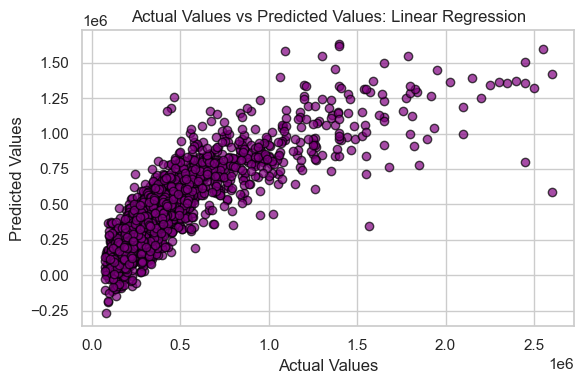

In [22]:
plotdiff(Y_test, lm_pred, 'Linear Regression', 'purple')

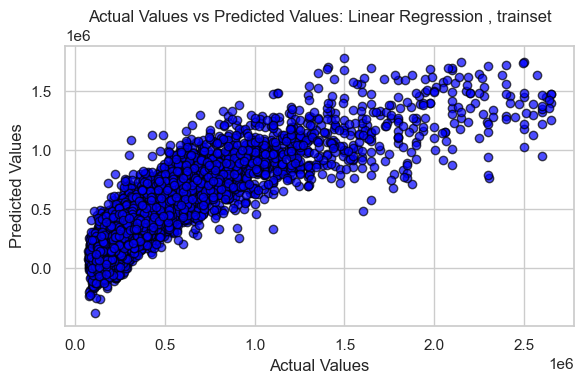

In [23]:
plotdiff(Y_train, lm_pred_train, "Linear Regression , trainset", 'blue')

## Ridge & Lasso

In [24]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)
rd_pred = ridge.predict(X_test)
scores(Y_test, rd_pred, 'Ridge reg.')

Model:  Ridge reg.
R2 Score:  0.6924181985689104
Mean Absolute Error:  112359.11049313775
Root Mean Squared Error:  173658.97080560084
Mean Absolute Percent Error:  0.326067901715657


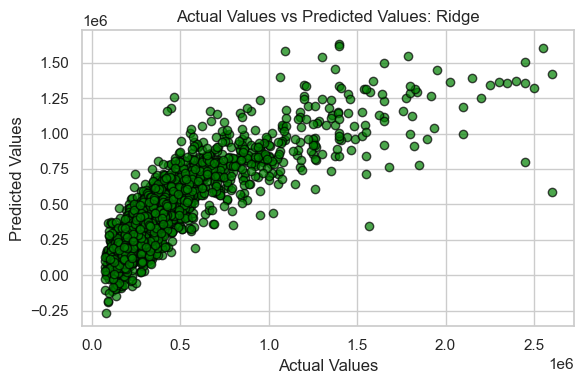

In [25]:
plotdiff(Y_test, rd_pred, 'Ridge', 'green')

In [26]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, Y_train)
ls_pred = lasso.predict(X_test)

scores(Y_test, ls_pred, 'Lasso')

Model:  Lasso
R2 Score:  0.6924238790912584
Mean Absolute Error:  112382.95150239415
Root Mean Squared Error:  173657.36720256798
Mean Absolute Percent Error:  0.3261871318749089


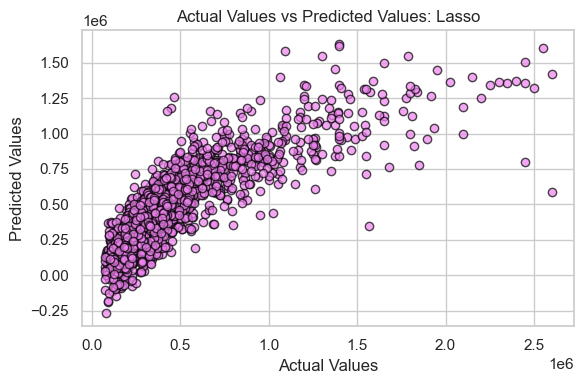

In [27]:
plotdiff(Y_test, ls_pred, 'Lasso', 'violet')

### Decision Tree Regressor

In [28]:
depths = np.arange(1,30,2)

dt_mape_avg = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=37)
    dt_mape = cross_val_score(dt, X_train, Y_train, cv=10, scoring=mape, n_jobs=4)
    
    dt_mape_avg.append(np.mean(dt_mape))
    
dt_mape_avg = np.array(dt_mape_avg)


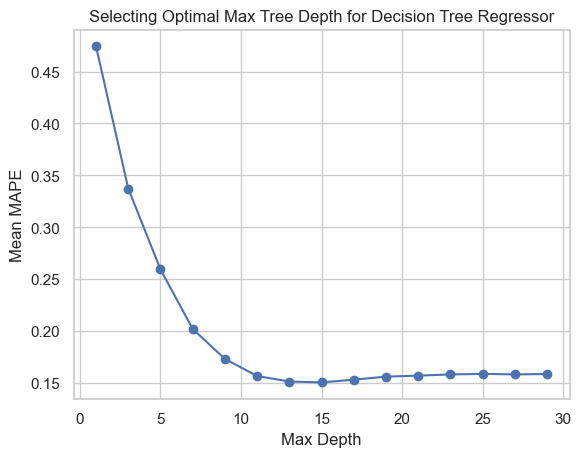

Optimal Max Tree Depth: 15


In [29]:
plt.plot(depths, dt_mape_avg, marker='o')
plt.title('Selecting Optimal Max Tree Depth for Decision Tree Regressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean MAPE')
plt.show()

optimal_max_depth = depths[np.argmin(dt_mape_avg)]
print(f'Optimal Max Tree Depth: {optimal_max_depth}')

In [30]:
dt_opt = DecisionTreeRegressor(max_depth=15, random_state=37)
dt_opt.fit(X_train,Y_train)

dt_pred = dt_opt.predict(X_test)
scores(Y_test, dt_pred, 'DecisionTreeRegressor')

Model:  DecisionTreeRegressor
R2 Score:  0.7738246713594601
Mean Absolute Error:  67055.86945871424
Root Mean Squared Error:  148915.36824328252
Mean Absolute Percent Error:  0.15308449768652976


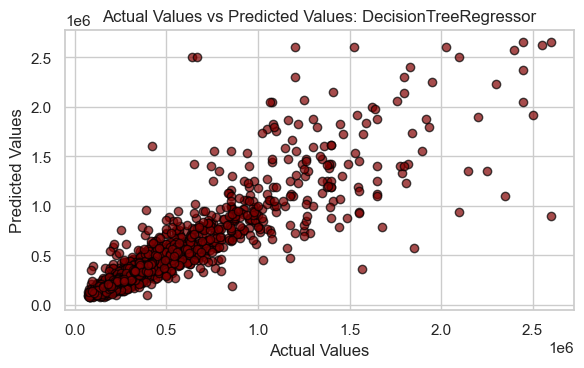

In [31]:
plotdiff(Y_test, dt_pred, 'DecisionTreeRegressor', 'maroon')

### Random Forest Regressor

In [32]:
rf_mape_avg = []

for depth in depths:
    rf = RandomForestRegressor(max_depth=depth, n_estimators=15, random_state=37)
    rf_mape = cross_val_score(rf, X_train, Y_train, cv=10, scoring=mape, n_jobs=4)
    rf_mape_avg.append(np.mean(rf_mape))

rf_mape_avg = np.array(rf_mape_avg)

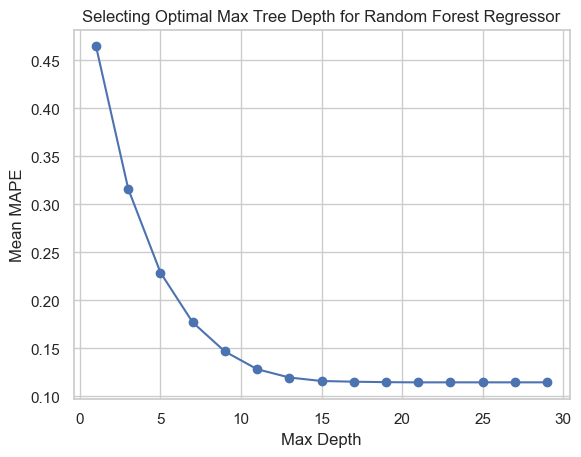

Optimal Max Tree Depth: 21


In [33]:
plt.plot(depths, rf_mape_avg, marker='o')
plt.title('Selecting Optimal Max Tree Depth for Random Forest Regressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean MAPE')
plt.show()

optimal_max_depth = depths[np.argmin(rf_mape_avg)]
print(f'Optimal Max Tree Depth: {optimal_max_depth}')

In [34]:
rf = RandomForestRegressor(max_depth=21, n_estimators=15, random_state=37)
rf.fit(X_train,Y_train)

rf_pred = rf.predict(X_test)

scores(Y_test, rf_pred, 'RandomForestRegressor')

Model:  RandomForestRegressor
R2 Score:  0.8915901776822114
Mean Absolute Error:  48227.480411639706
Root Mean Squared Error:  103098.23278357391
Mean Absolute Percent Error:  0.11544752252830076


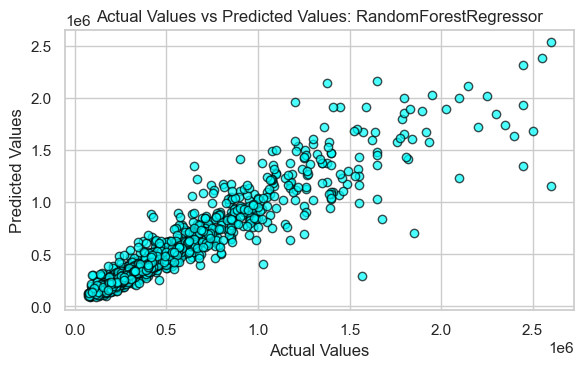

In [35]:
plotdiff(Y_test, rf_pred, 'RandomForestRegressor', 'cyan')

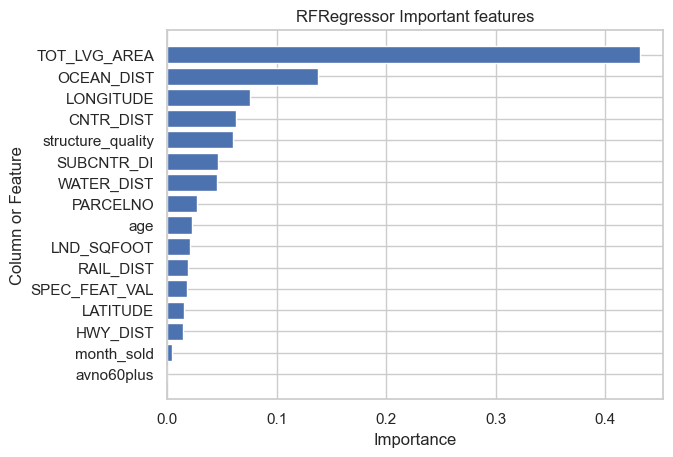

In [36]:
imp_features = rf.feature_importances_

f_names = X_columns

sorted_imp = imp_features.argsort()[::-1]


bars = plt.barh(range(16), imp_features[sorted_imp][::-1])
plt.yticks(range(16), [f_names[i] for i in sorted_imp][::-1])
plt.xlabel('Importance')
plt.ylabel('Column or Feature')
plt.title('RFRegressor Important features')
plt.show()

The total living area has more feature importance, since in real life larger area means more price.

Distance from the house to ocean is the second feature importance in this model.

### XGB Regressor

In [37]:
xgb_mape_avg = []

for depth in depths:
    xgb = XGBRegressor(max_depth = depth, n_estimators=15, random_state=37, objective='reg:squarederror')

    xgb_mape = cross_val_score(xgb, X_train, Y_train, cv=10, scoring=mape, n_jobs=4)
    xgb_mape_avg.append(np.mean(xgb_mape))

xgb_mape_avg = np.array(xgb_mape_avg)

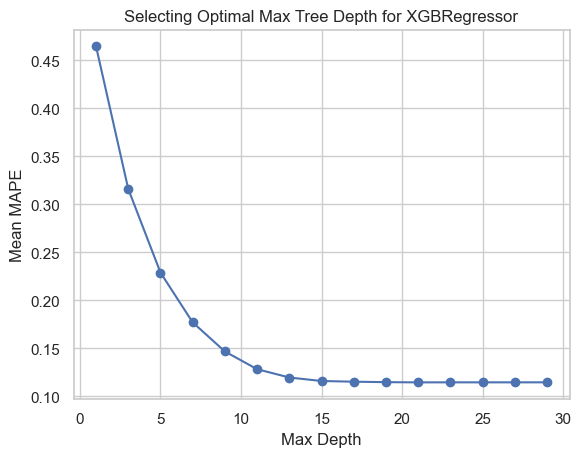

Optimal Max Tree Depth: 11


In [38]:
plt.plot(depths, rf_mape_avg, marker='o')
plt.title('Selecting Optimal Max Tree Depth for XGBRegressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean MAPE')
plt.show()

optimal_max_depth = depths[np.argmin(xgb_mape_avg)]
print(f'Optimal Max Tree Depth: {optimal_max_depth}')

In [39]:
xgb = XGBRegressor(max_depth = 11, n_estimators=15, random_state=37, objective='reg:squarederror')
xgb.fit(X_train, Y_train)

xgb_pred = xgb.predict(X_test)
scores(Y_test, xgb_pred, 'XGBRegressor')

Model:  XGBRegressor
R2 Score:  0.8826588137525304
Mean Absolute Error:  49690.04940348044
Root Mean Squared Error:  107261.07417626114
Mean Absolute Percent Error:  0.11518241556980105


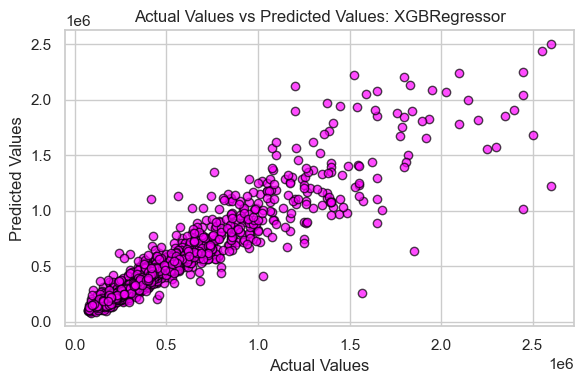

In [40]:
plotdiff(Y_test, xgb_pred, 'XGBRegressor', 'magenta')

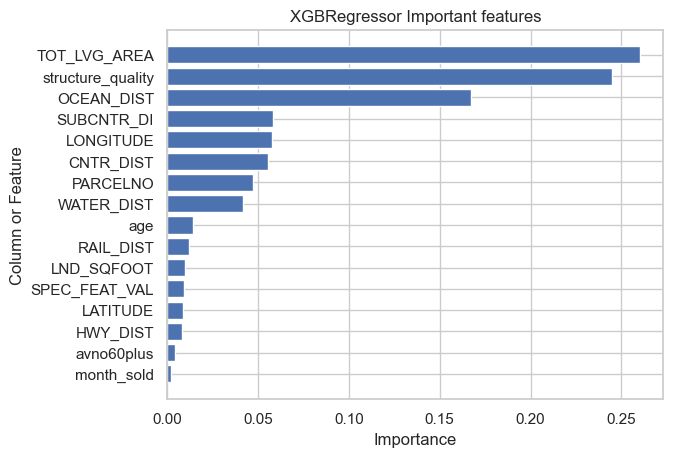

In [41]:
imp_features = xgb.feature_importances_

f_names = X_columns

sorted_imp = imp_features.argsort()[::-1]


bars = plt.barh(range(16), imp_features[sorted_imp][::-1])
plt.yticks(range(16), [f_names[i] for i in sorted_imp][::-1])
plt.xlabel('Importance')
plt.ylabel('Column or Feature')
plt.title('XGBRegressor Important features')
plt.show()

Again, Living Area has more feature importance like RandomForest.

But in this model the second most feature importance is structure quality i.e the quality of the house. 

### Model Evaluation

| Metric             | Description                                                                                 | Should be |
|--------------------|---------------------------------------------------------------------------------------------|-----------|
| R$^2$ Score | Indicates how well the regression line (or curve) fits the actual data points.   | Should be closer to 1 |
| Mean Absolute Error | It's the average of the absolute differences between predicted and actual values. | Should be closer to 0 |
| Root Mean Squared Error | RMSE measures the differences (errors) between predicted and actual values.  | Should be closer to 0 |
| Mean Absolute Percentage Error | It's a statistical measure used to assess the accuracy of forecasting or prediction models by calculating the average percentage difference between predicted and actual values.  | Should be closer to 0 |

#### Let us see how our models(best parameters) have performed:

In [42]:
col_names = ['Model', 'R2 Score', 'MAE', 'RMSE', 'MAPE']
perf_df = pd.DataFrame([model_m,r2_m, mae_m, rmse_m, mape_m])
perf_df = perf_df.T
perf_df.columns = col_names
perf_df

,Model,R2 Score,MAE,RMSE,MAPE
0,Linear Regression,0.692437,112388.576035,173653.73058,0.326219
1,Ridge reg.,0.692418,112359.110493,173658.970806,0.326068
2,Lasso,0.692424,112382.951502,173657.367203,0.326187
3,DecisionTreeRegressor,0.773825,67055.869459,148915.368243,0.153084
4,RandomForestRegressor,0.89159,48227.480412,103098.232784,0.115448
5,XGBRegressor,0.882659,49690.049403,107261.074176,0.115182


As you can see, Random Forest Regressor has done better than any other models.

XGB Regressor comes in the second place as a good alternative.

### Final Model & Pipeline

We choose Random Forest Regressor as our final model, and build our Pipeline.

In [43]:
Input = [('scale', MinMaxScaler()), ('model',RandomForestRegressor(max_depth=21,n_estimators=15))]
pipe = Pipeline(Input)
pipe.fit(X,Y)
ypipe = pipe.predict(X)

scores(Y, ypipe, 'RFPipe')

Model:  RFPipe
R2 Score:  0.9838036747659867
Mean Absolute Error:  18955.80934642082
Root Mean Squared Error:  40368.80934372867
Mean Absolute Percent Error:  0.046281020446584414


#### The Pipeline has performed very well by doing the scaling and modeling saving us some coding time.

## Conclusion

In summary, the basic models which assumes a linear relationship between Features and Target variable has performed mediocrely.

While ensemble models like Random Forest Regressor and XGBRegressor has done a fantastic job in capturing the important features.

**Important features in RandomForest Model:**
 - TOT_LVG_AREA
 - OCEAN_DIST
 - LONGITUDE
 - CNTR_DIST
 - structure_quality

**Important features in XGB Model:**
 - TOT_LVG_AREA
 - structure_quality
 - OCEAN_DIST
 - SUBCNTR_DI
 - LONGITUDE

### Future Improvements:

Although we managed to build a good model, there are other **external economic indicators** that can change the prediction.

Adding other factors such as Population Surge, Interest rates, New houses being built may be an **possible improvement** to the model.